# Optimización del Algortimo Regresión Logistica

In [2]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

In [3]:
# Leer los datos
datos = pd.read_csv("./framingham.csv")

In [4]:
# Variables de interés
variablesInteres = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
                     'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [5]:
X = datos[variablesInteres]
y = datos["TenYearCHD"]

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Imputación de valores NaN con la mediana después de dividir los datos
imputer = SimpleImputer(strategy='median')
X_train[variablesInteres] = imputer.fit_transform(X_train[variablesInteres])
X_test[variablesInteres] = imputer.transform(X_test[variablesInteres])

In [8]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [11]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

In [12]:
# Calcular y visualizar la curva ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)


In [13]:
# Imprimir los resultados
print(f"Precisión: {accuracy}")
print("Matriz de confusión:\n", conf_matrix)
print("Informe de clasificación:\n", class_report)
print(f"Cohen's Kappa: {cohen_kappa}")
print(f"AUC-ROC: {roc_auc}")


Precisión: 0.8669811320754717
Matriz de confusión:
 [[903   5]
 [136  16]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       908
           1       0.76      0.11      0.18       152

    accuracy                           0.87      1060
   macro avg       0.82      0.55      0.56      1060
weighted avg       0.85      0.87      0.82      1060

Cohen's Kappa: 0.15557413726863878
AUC-ROC: 0.71556920936703


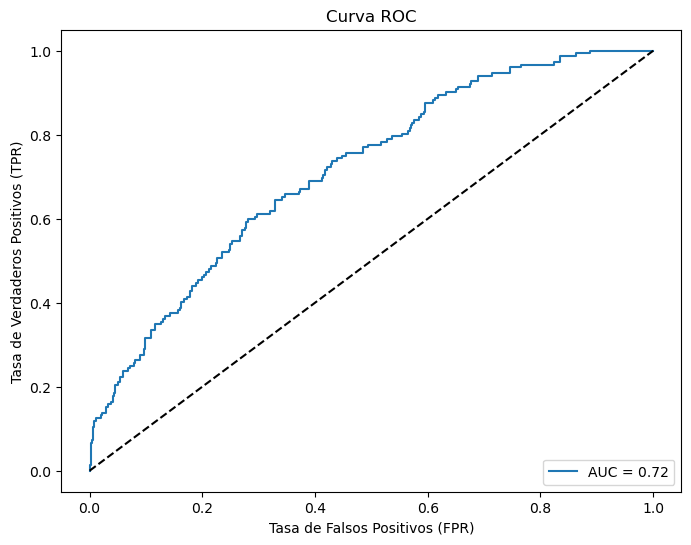

In [14]:
# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()